In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Alzamir\Alzheimer-s-Disease\alzheimers_disease_data.csv")

In [3]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [4]:
new_df = data.drop(columns=['PatientID', 'Gender', 'Ethnicity', 'EducationLevel',
       'Smoking', 'AlcoholConsumption', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'SystolicBP','DiastolicBP', 'Confusion',
       'Disorientation', 'DifficultyCompletingTasks',
       'Forgetfulness', 'DoctorInCharge'])

In [5]:
print(type(new_df))
print(new_df.shape)

<class 'pandas.core.frame.DataFrame'>
(2149, 18)


In [6]:
X = new_df.drop(columns=['Diagnosis'])
y = new_df['Diagnosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline for scaling + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Small, fast parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1],
    'svm__kernel': ['linear', 'rbf']
}

# GridSearchCV with small folds
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Score: 0.8656856274171444


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       401
           1       0.82      0.71      0.76       244

    accuracy                           0.83       645
   macro avg       0.83      0.81      0.82       645
weighted avg       0.83      0.83      0.83       645



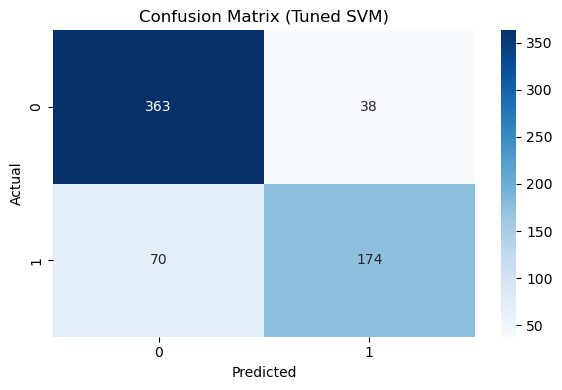

Accuracy: 0.8326
F1 Score: 0.8299


In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline with best parameters
best_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=10, gamma=0.01, kernel='rbf'))
])

# Fit model
best_svm.fit(X_train, y_train)

# Predictions
y_pred = best_svm.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Tuned SVM)")
plt.tight_layout()
plt.show()

# Accuracy & F1 Score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
